# Case Study on Probability for Data Science

Problem Statement: 
To make a suitable machine learning algorithm to predict if the mushroom is 
edible or poisonous (e or p) using the given dataset.

# Importing libraries

In [1]:
import numpy as np
import pandas as pd

# Step 1: Loading dataset

In [2]:
data=pd.read_csv("Downloads/Data science/mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Step 2: Feature Description

In [3]:
data.shape

(8124, 23)

Data contains 8124 rows and 23 columns

In [5]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

Attribute Information:

• cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 

• cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 

• cap-colour: brown=n, buff=b, cinnamon=c, Gray=g, green=r, pink=p, purple=u,red=e, white=w, yellow=y 

• bruises: bruises=t, no=f 

• odour: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n,pungent=p, spicy=s 

• gill-attachment: attached=a, descending=d, free=f, notched=n 

• gill-spacing: close=c, crowded=w, distant=d 

• gill-size: broad=b, narrow=n 

• gill-colour: black=k, brown=n, buff=b, chocolate=h, grey=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 

• stalk-shape: enlarging=e, tapering=t 

• Stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r 

• stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 

• stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 

• stalk-colour-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o,pink=p, red=e, white=w, yellow=y 

• stalk-colour-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o,pink=p, red=e, white=w, yellow=y 

• veil-type: partial=p, universal=u 

• veil-colour: brown=n, orange=o, white=w, yellow=y 

• ring-number: none=n, one=o, two=t 

• ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p,sheathing=s, zone=z 

• spore-print-colour: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o,purple=u, white=w, yellow=y 

• population: abundant=a, clustered=c, numerous=n, scattered=s, several=v,solitary=y 

• habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w,woods=d

# Step 3: Preprocessing

# Checking missing values

In [8]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [13]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [18]:
#to find the unique values in each column
columns=data.columns
for i in columns:
    print(i,data[i].unique())

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


verifying this we can see '?' in stalk-root it is the missing value in that column.

In [25]:
#to locate the missing values in that 'stalk-root' column
k=data.loc[(data['stalk-root']=='?')]
k.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3984,e,x,y,b,t,n,f,c,b,e,...,s,e,w,p,w,t,e,w,c,w
4023,p,x,y,e,f,y,f,c,n,b,...,s,w,w,p,w,o,e,w,v,p
4076,e,f,y,u,f,n,f,c,n,h,...,f,w,w,p,w,o,f,h,y,d
4100,p,x,y,e,f,y,f,c,n,b,...,s,p,p,p,w,o,e,w,v,d
4104,p,x,y,n,f,f,f,c,n,b,...,s,p,p,p,w,o,e,w,v,l


In [24]:
k['stalk-root']

3984    ?
4023    ?
4076    ?
4100    ?
4104    ?
       ..
8119    ?
8120    ?
8121    ?
8122    ?
8123    ?
Name: stalk-root, Length: 2480, dtype: object

In [31]:
ind=k.index
ind

Int64Index([3984, 4023, 4076, 4100, 4104, 4196, 4200, 4283, 4291, 4326,
            ...
            8113, 8115, 8116, 8117, 8118, 8119, 8120, 8121, 8122, 8123],
           dtype='int64', length=2480)

In [27]:
data['stalk-root'].mode()

0    b
dtype: object

In [32]:
#filling of these missing values
data['stalk-root'][ind]='b'

In [35]:
#checking whether the mising values are filled
data['stalk-root'].unique()

array(['e', 'c', 'b', 'r'], dtype=object)

# Splitting of data into target and feature column

In [105]:
#Feature column
X=data.drop(['class'],axis=1)

#Target column
y=data['class']

In [42]:
X.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [40]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

# Encoding

# Label Encoding

In [106]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
y = label_en.fit_transform(y)  

In [107]:
y

array([1, 0, 0, ..., 0, 1, 0])

Edible is encoded as 0

Poisonous is encoded as 1

# One-hot encoding

In [108]:
X = pd.get_dummies(X)

In [109]:
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [110]:
X.describe()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.055638,0.000492,0.387986,0.101920,0.003939,0.450025,0.285574,0.000492,0.314623,0.399311,...,0.153619,0.497292,0.210734,0.387494,0.264402,0.102413,0.035943,0.140817,0.045298,0.023634
std,0.229235,0.022185,0.487321,0.302562,0.062641,0.497527,0.451715,0.022185,0.464394,0.489787,...,0.360605,0.500023,0.407855,0.487208,0.441041,0.303209,0.186159,0.347854,0.207969,0.151914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Step 4: Splitting of data as train data and test data

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [50]:
X_train.shape

(6093, 116)

In [51]:
X_test.shape

(2031, 116)

In [52]:
y_train.shape

(6093,)

In [53]:
y_test.shape

(2031,)

# Step 5: Building Model

# Logistic Regression

In [54]:
import warnings
warnings.filterwarnings('ignore')

In [55]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [56]:
y_pred1=lr.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [58]:
accuracy_score(y_test,y_pred1)

1.0

In [59]:
confusion_matrix(y_test,y_pred1)

array([[1040,    0],
       [   0,  991]], dtype=int64)

# Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [61]:
y_pred2=dt.predict(X_test)

In [62]:
accuracy_score(y_test,y_pred2)

1.0

In [63]:
confusion_matrix(y_test,y_pred2)

array([[1040,    0],
       [   0,  991]], dtype=int64)

# Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [65]:
y_pred3=rf.predict(X_test)

In [66]:
accuracy_score(y_test,y_pred3)

1.0

In [67]:
confusion_matrix(y_test,y_pred3)

array([[1040,    0],
       [   0,  991]], dtype=int64)

# KNN

In [69]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    Classifier =KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    Classifier.fit(X_train,y_train)
    y_pred=Classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [70]:
acc_values

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.999507631708518,
 0.999507631708518,
 0.999015263417036]

Text(0, 0.5, 'accuracy')

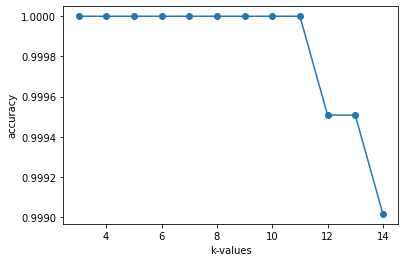

In [72]:
import matplotlib.pyplot as plt
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k-values')
plt.ylabel('accuracy')

In [75]:
Classifier =KNeighborsClassifier(n_neighbors=4,metric='minkowski')
Classifier.fit(X_train,y_train)
y_pred4=Classifier.predict(X_test)

In [76]:
accuracy_score(y_test,y_pred4)

1.0

In [77]:
X.shape

(8124, 116)

# NAIIVE BAYES ALGORITHM


In [153]:
T=X.iloc[:,range(0,116)].values           

In [154]:
T

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [155]:
T.shape

(8124, 116)

In [156]:
H=pd.DataFrame({'class':y})

In [157]:
H

,class
0,1
1,0
2,0
3,1
4,0
...,...
8119,0
8120,0
8121,0
8122,1


In [158]:
S=H.iloc[:,0].values

In [159]:
S

array([1, 0, 0, ..., 0, 1, 0])

In [160]:
S.shape

(8124,)

In [161]:
from sklearn.model_selection import train_test_split
T_train,T_test,S_train,S_test=train_test_split(T,S,test_size=0.25,random_state=0)

In [162]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(T_train,S_train)

GaussianNB()

In [163]:
S_pred=classifier.predict(T_test)

In [164]:
S_pred

array([1, 0, 0, ..., 1, 0, 0])

In [165]:
a=accuracy_score(S_test,S_pred)
c=confusion_matrix(S_test,S_pred)

In [166]:
print("accuracy is: ",a)
print("confusion matrix is: ",c)

accuracy is:  0.9601181683899557
confusion matrix is:  [[980  81]
 [  0 970]]


In [167]:
from sklearn.naive_bayes import BernoulliNB
classifier1=BernoulliNB()
classifier1.fit(T_train,S_train)

BernoulliNB()

In [169]:
S_pred1=classifier.predict(T_test)

In [170]:
S_pred1

array([1, 0, 0, ..., 1, 0, 0])

In [171]:
a=accuracy_score(S_test,S_pred1)
c=confusion_matrix(S_test,S_pred1)

In [172]:
print("accuracy is: ",a)
print("confusion matrix is: ",c)

accuracy is:  0.9601181683899557
confusion matrix is:  [[980  81]
 [  0 970]]


# Conclusion:

We used different algorithms for prediction and found their accuracy. We can see that all except Naive bayes classifier have accuracy 100%. All these algorithms are best algorithms for prediction.
